In [406]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [407]:
path_to_adata =r'D:\Tatsuya\merscope\Baysor_segmentations\avrrpt24\cellxgene_with_motifavrrpt24.h5ad'
path_to_bacteria_spots = r'D:\Alex\MERSCOPE_reanalysis_output\smFISH_output\Avr_first_run\centroids_final_spots.npy'
adata = sc.read(path_to_adata)

In [408]:
bacteria = np.load(path_to_bacteria_spots)

In [409]:
bacteria_adata = ad.AnnData(X = np.zeros((len(bacteria), len(adata.var))), var=adata.var, obs = ['bacteria'+str(i) for i in range(len(bacteria))])
bacteria_adata.obs.index = bacteria_adata.obs[0]
bacteria_adata.obs = pd.read_csv(r'D:\Alex\MERSCOPE_reanalysis_output\smFISH_output\Avr_first_run\observations.csv')

C:\Users\amonell\AppData\Local\Temp\ipykernel_15176\371000716.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bacteria_adata = ad.AnnData(X = np.zeros((len(bacteria), len(adata.var))), var=adata.var, obs = ['bacteria'+str(i) for i in range(len(bacteria))])


In [410]:
bacteria_adata.obs = bacteria_adata.obs.drop(['Unnamed: 0'], axis=1)

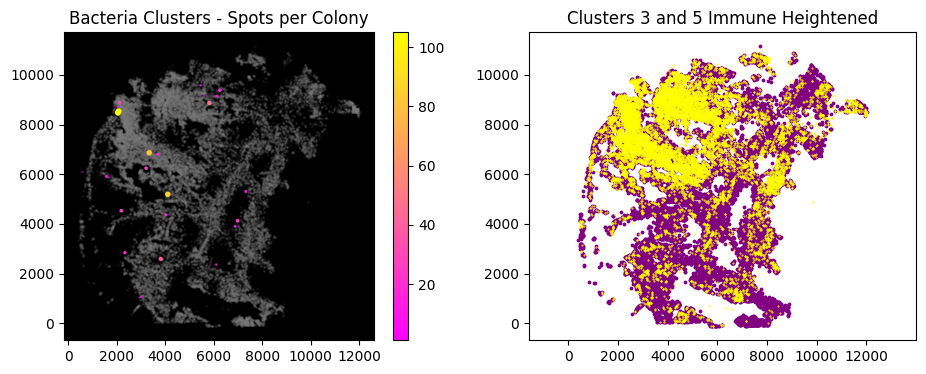

In [411]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
ax1.scatter(adata.obsm['X_spatial'].T[0], adata.obsm['X_spatial'].T[1], c = 'gray', s = 1, alpha=0.1)
ax1.set_facecolor('black')
ax1.set_title('Bacteria Clusters - Spots per Colony')

im = ax1.scatter(bacteria.T[1], bacteria.T[0], c = bacteria_adata.obs['total_spots_in_colony'], s = bacteria_adata.obs['total_spots_in_colony']/10, cmap = 'spring')

fig.colorbar(im, ax=ax1, orientation='vertical')

colors = []
for i in adata.obs.seurat_clusters_transfer:
    if (i == '3') or (i == '5'):
        colors.append(True)
    else:
        colors.append(False)

ax2.scatter(adata.obsm['X_spatial'].T[0][np.where(np.array(colors) == False)], adata.obsm['X_spatial'].T[1][np.where(np.array(colors) == False)], c = 'purple', s = 3)
ax2.scatter(adata.obsm['X_spatial'].T[0][np.where(np.array(colors) == True)], adata.obsm['X_spatial'].T[1][np.where(np.array(colors) == True)], c = 'yellow', s = 0.2, label = '3 and 5')
ax2.set_title('Clusters 3 and 5 Immune Heightened')
plt.axis('equal')
plt.show()

In [412]:
bacteria_adata.obs['hrpL distance - pvds Distance From Centroid'] = bacteria_adata.obs['hrpl_median_distance_from_centroid'] - bacteria_adata.obs['pvds_median_distance_from_centroid']
bacteria_adata.obs['Pvds distance - hrpl Distance From Centroid'] = bacteria_adata.obs['pvds_median_distance_from_centroid'] - bacteria_adata.obs['hrpl_median_distance_from_centroid']
bacteria_adata.obs['bac_spots'] = bacteria_adata.obs['total_spots_in_colony'] - bacteria_adata.obs['number_hrpl'] - bacteria_adata.obs['number_pvds']

In [413]:
bacteria_adata.obs = bacteria_adata.obs.fillna(-1)

In [492]:
bacteria_adata.obs['hrpl_normalized_distance_from_center'] = bacteria_adata.obs['hrpl_median_distance_from_centroid']/bacteria_adata.obs['median_distance_from_centroid']

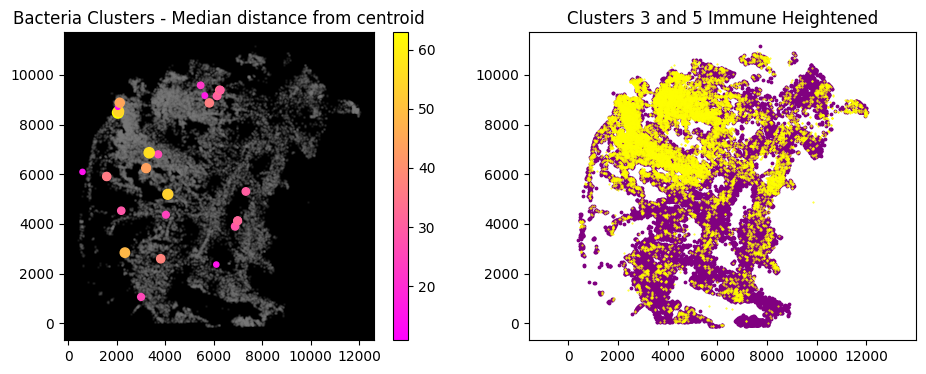

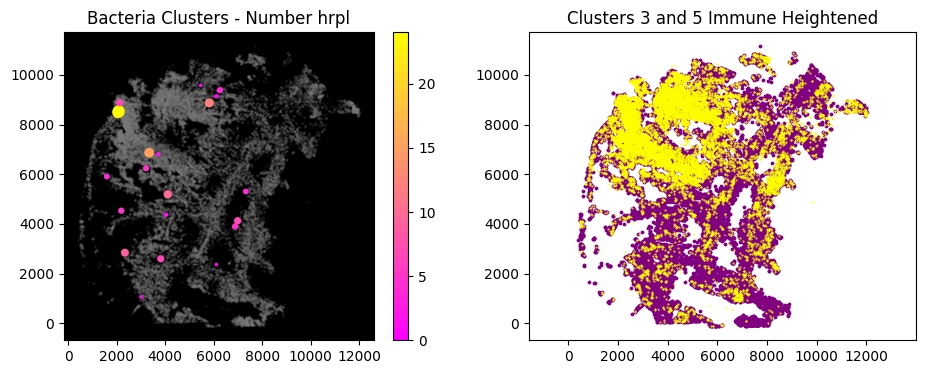

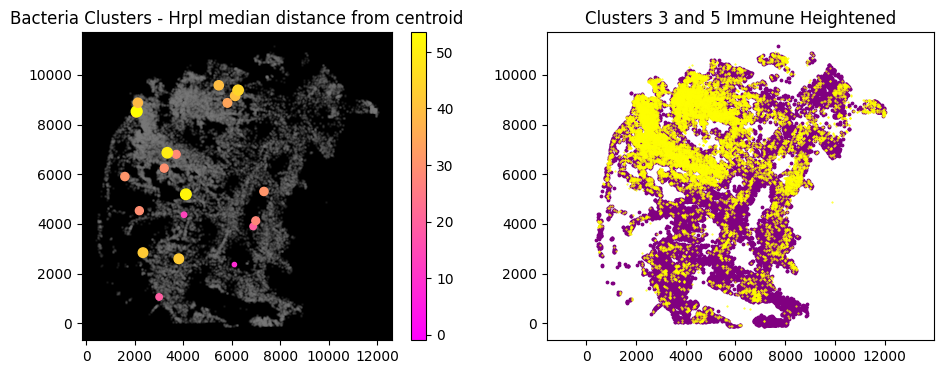

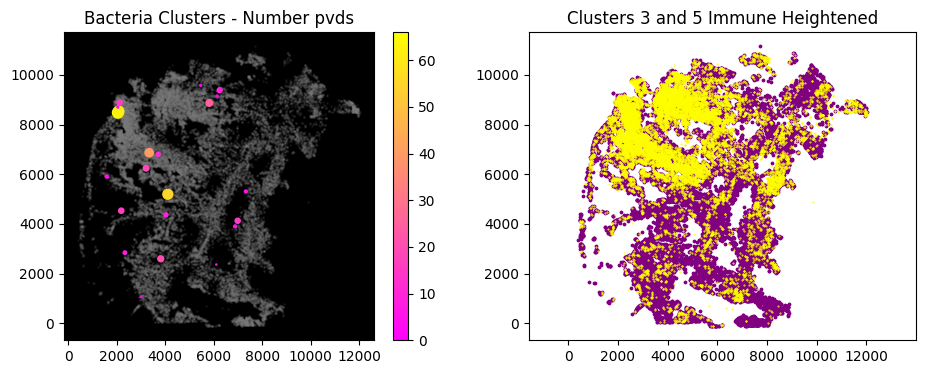

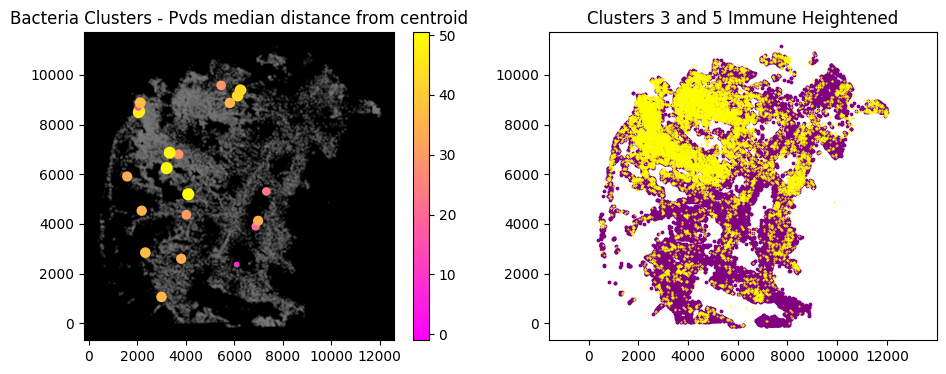

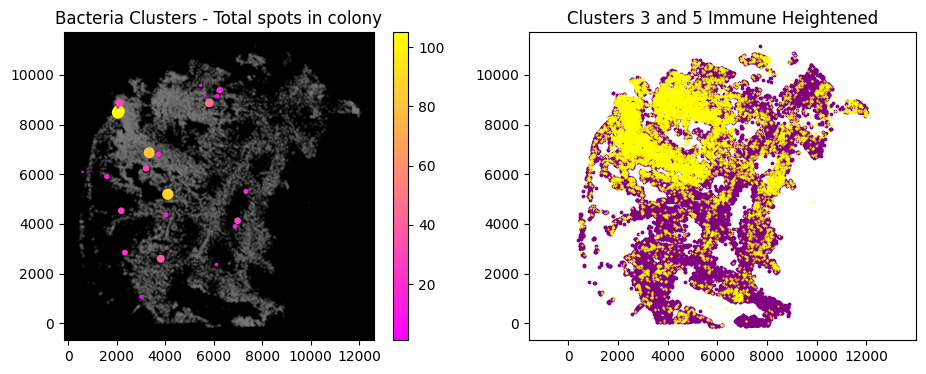

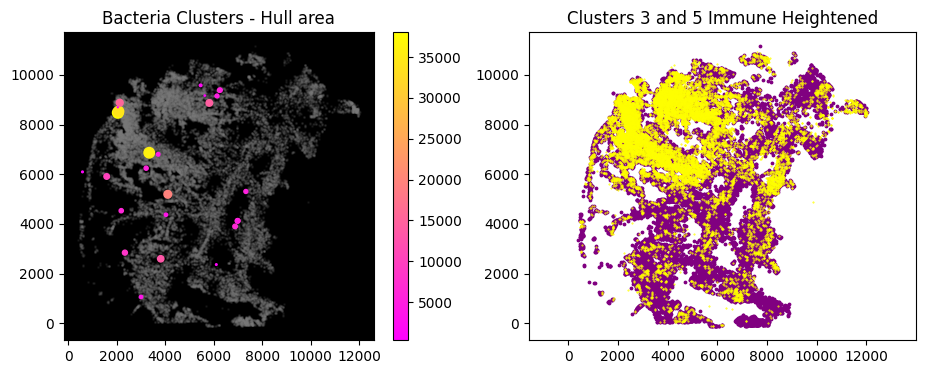

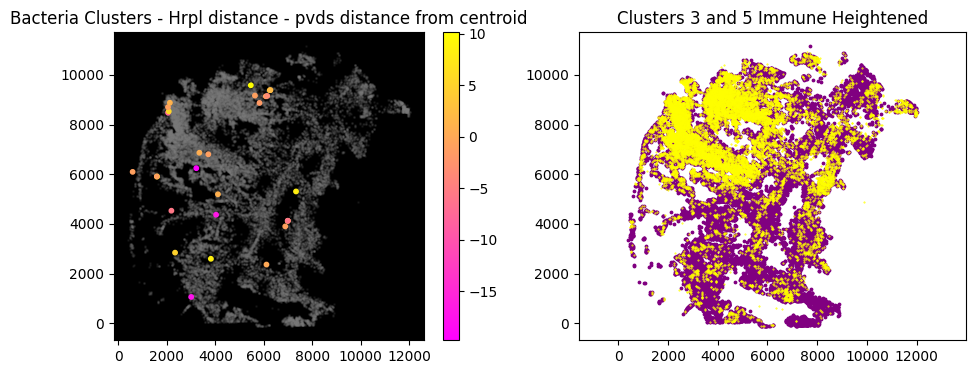

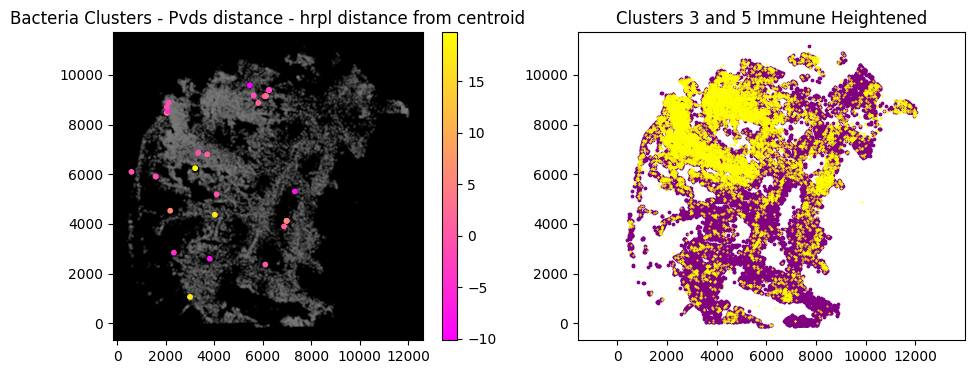

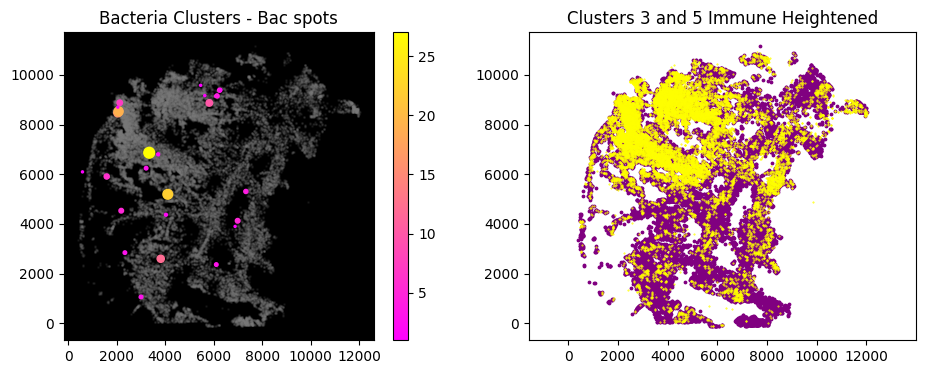

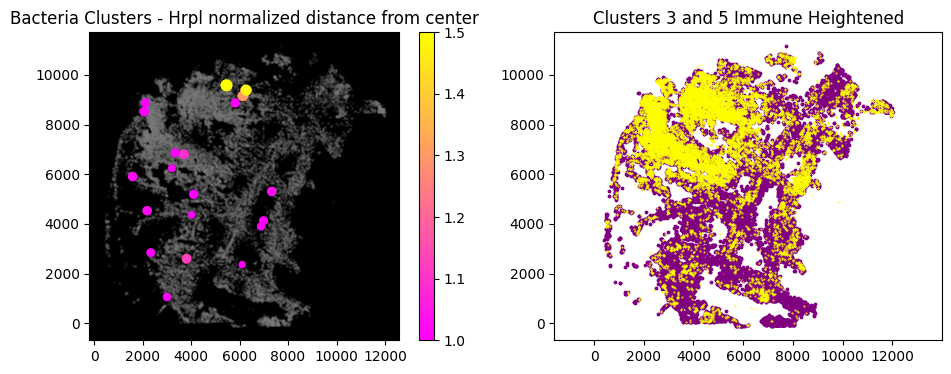

In [496]:
for bg in bacteria_adata.obs.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
    ax1.scatter(adata.obsm['X_spatial'].T[0], adata.obsm['X_spatial'].T[1], c = 'gray', s = 1, alpha=0.1)
    ax1.set_facecolor('black')
    ax1.set_title('Bacteria Clusters - '+bg.replace('_', ' ').capitalize())
    if (bg != 'hrpL distance - pvds Distance From Centroid') and (bg != 'Pvds distance - hrpl Distance From Centroid'):
        if (bg != 'hrpl_normalized_distance_from_center'):
            im = ax1.scatter(bacteria.T[1], bacteria.T[0], c = bacteria_adata.obs[bg], s = bacteria_adata.obs[bg]/(np.max(bacteria_adata.obs[bg].tolist())/60), cmap = 'spring')
        else:
            im = ax1.scatter(bacteria.T[1], bacteria.T[0], c = bacteria_adata.obs[bg], s = bacteria_adata.obs[bg]/(np.max(bacteria_adata.obs[bg].tolist())/60), cmap = 'spring', vmin = 1, vmax = 1.5)
    else:
        im = ax1.scatter(bacteria.T[1], bacteria.T[0], c = bacteria_adata.obs[bg], s = 10, cmap = 'spring')

        
    fig.colorbar(im, ax=ax1, orientation='vertical')

    colors = []
    for i in adata.obs.seurat_clusters_transfer:
        if (i == '3') or (i == '5'):
            colors.append(True)
        else:
            colors.append(False)

    ax2.scatter(adata.obsm['X_spatial'].T[0][np.where(np.array(colors) == False)], adata.obsm['X_spatial'].T[1][np.where(np.array(colors) == False)], c = 'purple', s = 3)
    ax2.scatter(adata.obsm['X_spatial'].T[0][np.where(np.array(colors) == True)], adata.obsm['X_spatial'].T[1][np.where(np.array(colors) == True)], c = 'yellow', s = 0.2, label = '3 and 5')
    ax2.set_title('Clusters 3 and 5 Immune Heightened')
    plt.axis('equal')
    plt.savefig(r'D:\Alex\MERSCOPE_reanalysis_output\smFISH_output\Avr_first_run\final_spot_for_adata\Image-'+bg+'.png')
    plt.show()
    plt.close()

In [415]:
bacteria_overlay = sc.concat([adata, bacteria_adata], join='outer')
bacteria_overlay.obsm['X_spatial'][-len(bacteria):] = np.array([bacteria.T[1], bacteria.T[0]]).T 

In [417]:
bacterial = []
for row in bacteria_overlay.obs['median_distance_from_centroid'].tolist():
    if row >= 0:
        bacterial.append('bac')
    else:
        bacterial.append('cell')

In [418]:
bacteria_overlay.obs['bacterial'] = bacterial

In [419]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Function for calculating the depth
def get_depth(adata, targets):
    qdata = adata[~adata.obs['bacterial'].isin(targets)] # Cell types to calculate depth for
    tdata = adata[adata.obs['bacterial'].isin(targets)] # Cell types to use for depth calculation
    nn = NearestNeighbors(n_neighbors=3, n_jobs=32)
    nn.fit(tdata.obsm['X_spatial'])
    dist, _ = nn.kneighbors(qdata.obsm['X_spatial'], n_neighbors=5)
    #dist = dist.mean(axis=1) # Dan suggested using median instead of mean
    dist = np.median(dist, axis=1)
    return pd.Series(data=dist, index=qdata.obs.index)
depth = get_depth(bacteria_overlay, ['bac'])

In [420]:
bacteria_overlay.obs['depth'] = depth.fillna(0)

In [421]:
bacterial_coords = bacteria_overlay.obsm['X_spatial'][np.where(bacteria_overlay.obs['bacterial'] == 'bac')]
non_bacterial_coords = bacteria_overlay.obsm['X_spatial'][np.where(bacteria_overlay.obs['bacterial'] != 'bac')]

In [422]:
bacteria_overlay.obs['number_pvds_and_hrpl'] = bacteria_overlay.obs['number_pvds'] + bacteria_overlay.obs['number_hrpl']

In [458]:
bacvals = np.where(bacteria_overlay.obs['bacterial'] == 'bac')
bacval_array = []
for i in range(len(bacteria_overlay.obsm['X_spatial'].tolist())):
    if i in bacvals[0]:
        bacval_array.append(bacteria_overlay.obs['bac_spots'].tolist()[i])
    #else:
    #    bacval_array.append(0)
bacval_array = np.clip(bacval_array, 0, np.max(bacval_array))

In [448]:
maximum_distance = 0
for other in range(len(bacteria_overlay.obsm['X_spatial'])):
    for bco in range(len(bacterial_coords)):
        distance_between = distance_to_point(bacterial_coords[bco], bacteria_overlay.obsm['X_spatial'][other])
        if distance_between > maximum_distance:
            maximum_distance = distance_between

In [462]:
import math
def distance_to_point(point1, point2):
    return math.sqrt(((point1[0] - point2[0])**2) + ((point1[1] - point2[1])**2))
weighted_distances = []
for other in range(len(bacteria_overlay.obsm['X_spatial'])):
    weighted_distance = 0
    for bco in range(len(bacterial_coords)):
        distance_between = distance_to_point(bacterial_coords[bco], bacteria_overlay.obsm['X_spatial'][other])
        #print((bacval_array[bco]/np.max(bacval_array)))
        weighted_distance += (maximum_distance/(distance_between+maximum_distance)) * (bacval_array[bco]/np.max(bacval_array))
    weighted_distances.append(weighted_distance)

In [463]:
bacteria_overlay.obs['weighted'] = weighted_distances

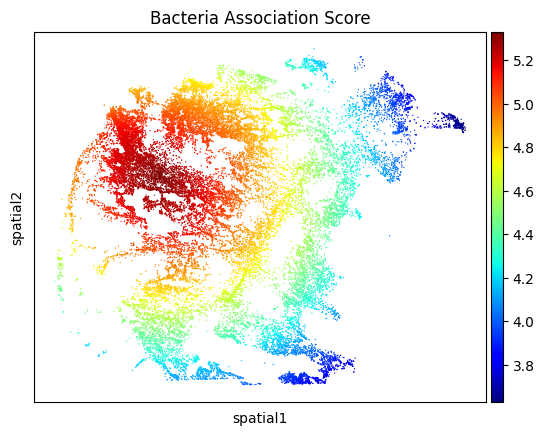

In [555]:
sc.pl.embedding(bacteria_overlay, basis = 'spatial',  color = 'weighted', cmap = 'jet', title = 'Bacteria Association Score')

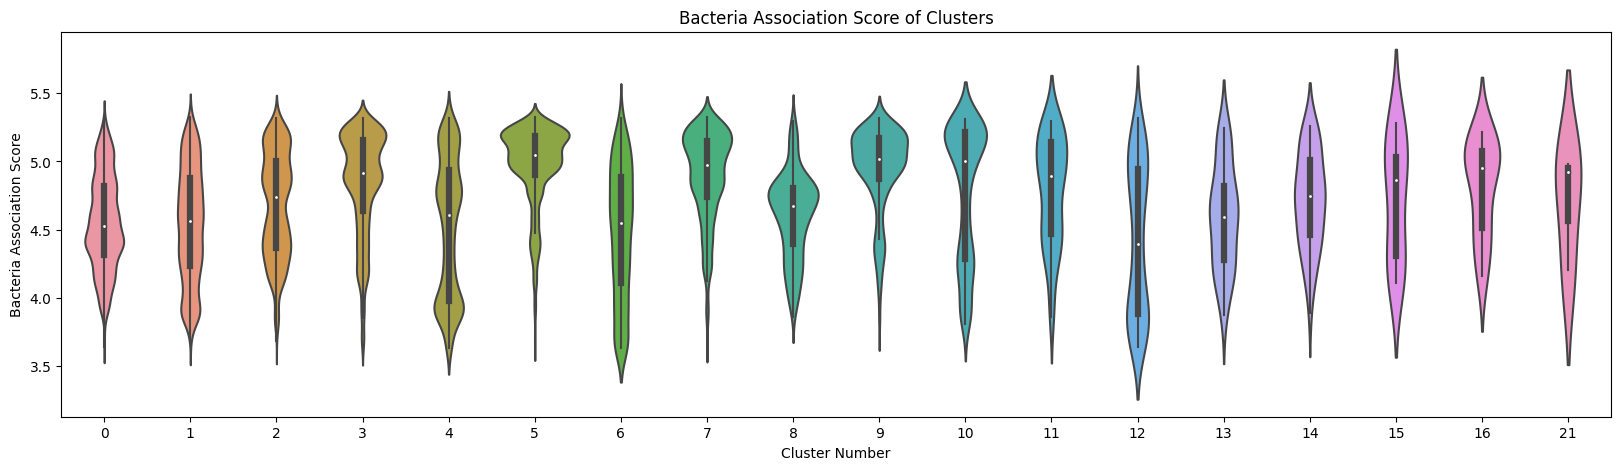

In [562]:
import seaborn as sns
data_to_plot = []
for clus in np.sort([int(cl) for cl in np.unique(bacteria_overlay.obs['seurat_clusters_transfer'].tolist()) if cl != 'nan']):
    data_to_plot.append(np.array(bacteria_overlay.obs['weighted'].tolist())[np.where(np.array(bacteria_overlay.obs['seurat_clusters_transfer'].tolist()) == str(clus))])

# Create a figure instance
plt.figure(figsize=(20, 5))
# Create the boxplot
bp = sns.violinplot(data_to_plot)
bp.set(xlabel='Cluster Number', ylabel= 'Bacteria Association Score', xticklabels = np.sort([int(cl) for cl in np.unique(bacteria_overlay.obs['seurat_clusters_transfer'].tolist()) if cl != 'nan']))
bp.set_title('Bacteria Association Score of Clusters')
plt.show()

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

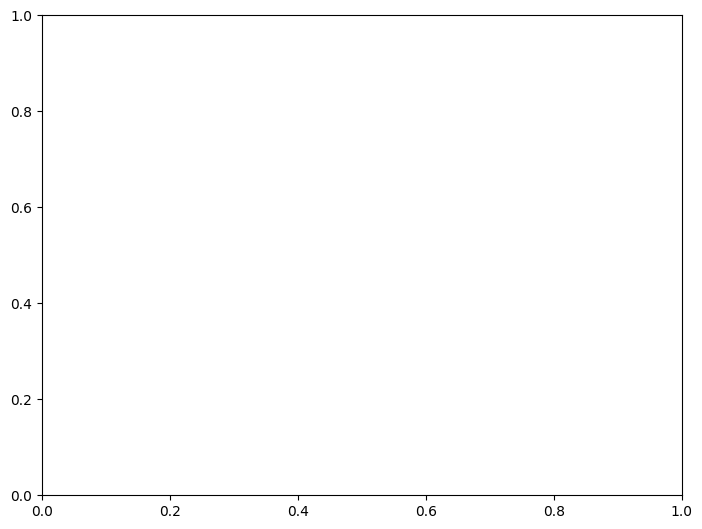

In [518]:
data_to_plot = [np.array(bacteria_overlay.obs['seurat_clusters_transfer'].tolist())[np.where(np.array(bacteria_overlay.obs['weighted'].tolist()) > 4.4)], np.array(bacteria_overlay.obs['seurat_clusters_transfer'].tolist())[np.where(np.array(bacteria_overlay.obs['weighted'].tolist()) < 4.4)]]

fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

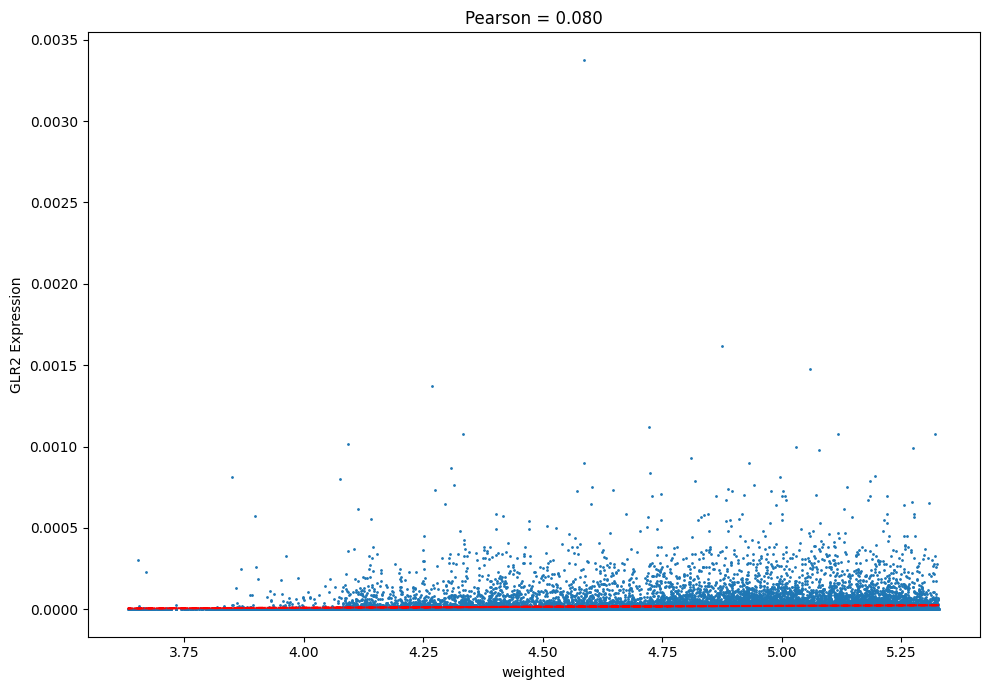

In [512]:
from scipy import stats
def plot_correlation(xcounts, ycounts, xlabel, ylabel, outfile=None, omit=[]):
    x = xcounts
    y = ycounts
    corr, pval = stats.pearsonr(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.figure(figsize=(10, 7))
    plt.plot(x, p(x), "r--")
    plt.scatter(x, y, s = 1)
    plt.title("Pearson = %.3f" % corr)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.tight_layout()
    #if outfile:
    #    plt.savefig(outfile, dpi=300)
plot_correlation(bacteria_overlay.obs['weighted'].tolist(), list(bacteria_overlay.X[:, np.where(bacteria_overlay.var.index.str.startswith('GLR2'))].flatten()), xlabel='weighted', ylabel='GLR2 Expression')

In [467]:
compare_hrpl_and_pvd = bacteria_adata.obs

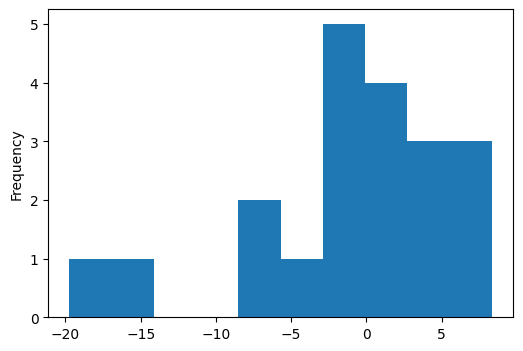

In [497]:
fig, ax = plt.subplots(figsize = (6,4))
a = compare_hrpl_and_pvd[compare_hrpl_and_pvd['total_spots_in_colony'] > 10]['hrpL distance - pvds Distance From Centroid']
a.plot(kind = "hist")
plt.show()